In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [76]:
# Configuration des graphiques
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_palette("husl")

print("=" * 60)
print("SEGMENTATION MARKETING - ANALYSE DES CLUSTERS CLIENTS")
print("=" * 60)

SEGMENTATION MARKETING - ANALYSE DES CLUSTERS CLIENTS


#1. CHARGEMENT ET EXPLORATION DES DONNÉES

In [77]:
df = pd.read_csv('segmentation_marketing_raw.csv')
print(f"✓ Dataset chargé avec succès: {df.shape[0]} lignes, {df.shape[1]} colonnes")

✓ Dataset chargé avec succès: 1000 lignes, 5 colonnes


In [78]:
# Affichage des informations de base
print(f"\nAperçu des données:")
print(df.head())


Aperçu des données:
   revenu_annuel  score_fidelite  frequence_achat  depenses_moyennes  \
0   14881.677995       22.196919         6.806772         204.394754   
1    2893.743943      141.295571        24.485165         105.721317   
2    3145.108178      144.340516        22.243463         131.838045   
3   37007.571714       91.523851        16.206595         231.886349   
4   45970.754186      154.452888        21.233931         230.005316   

   anciennete_client  
0          -6.934403  
1          -5.523089  
2         -10.182287  
3         -12.502604  
4          -6.482347  


In [79]:
print(f"\nInformations statistiques:")
print(df.describe())


Informations statistiques:
       revenu_annuel  score_fidelite  frequence_achat  depenses_moyennes  \
count    1000.000000     1000.000000      1000.000000        1000.000000   
mean    18236.691160       64.171301        19.571957         185.453664   
std     14772.784490       80.822731         6.148638          70.702796   
min    -17709.658613      -74.746881         1.967360          -2.947816   
25%      7752.134497      -14.623872        15.043403         133.127197   
50%     16897.737850       74.826575        20.910105         198.142703   
75%     28707.069879      141.951829        24.210355         241.444673   
max     55479.628774      178.600714        32.452095         355.045338   

       anciennete_client  
count        1000.000000  
mean           -1.624200  
std             9.480361  
min           -16.257472  
25%            -8.468083  
50%            -5.017609  
75%             5.297349  
max            22.902226  


In [80]:
print(f"\nTypes de données:")
print(df.dtypes)


Types de données:
revenu_annuel        float64
score_fidelite       float64
frequence_achat      float64
depenses_moyennes    float64
anciennete_client    float64
dtype: object


In [81]:
print(f"\nValeurs manquantes:")
print(df.isnull().sum())


Valeurs manquantes:
revenu_annuel        0
score_fidelite       0
frequence_achat      0
depenses_moyennes    0
anciennete_client    0
dtype: int64


#2. ANALYSE EXPLORATOIRE DES DONNÉES (EDA)

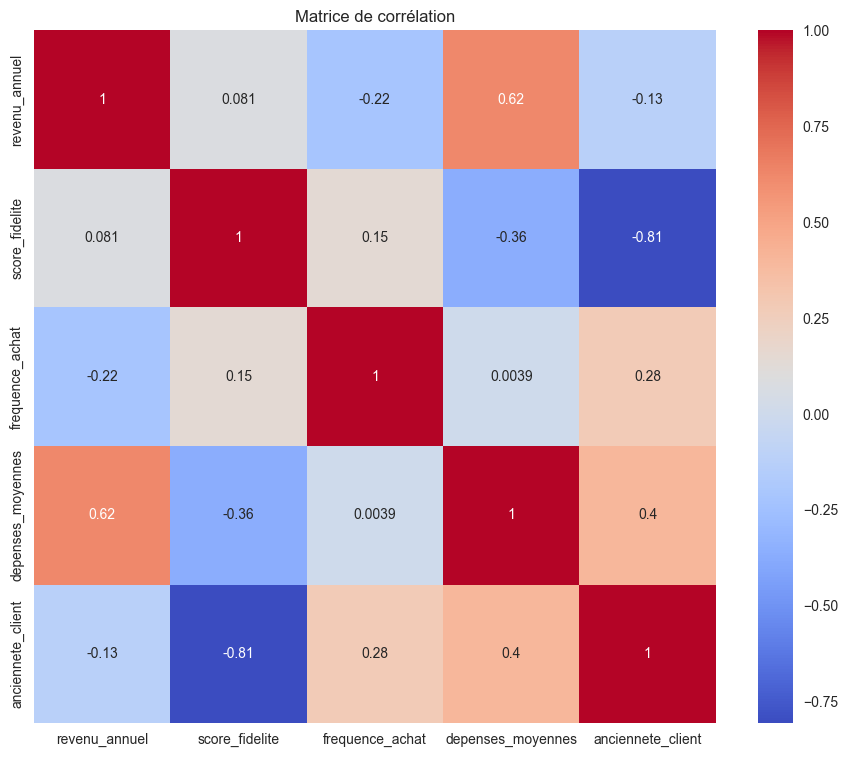

In [82]:
# 3. Visualisation préliminaire
plt.figure(figsize=(11,9))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()


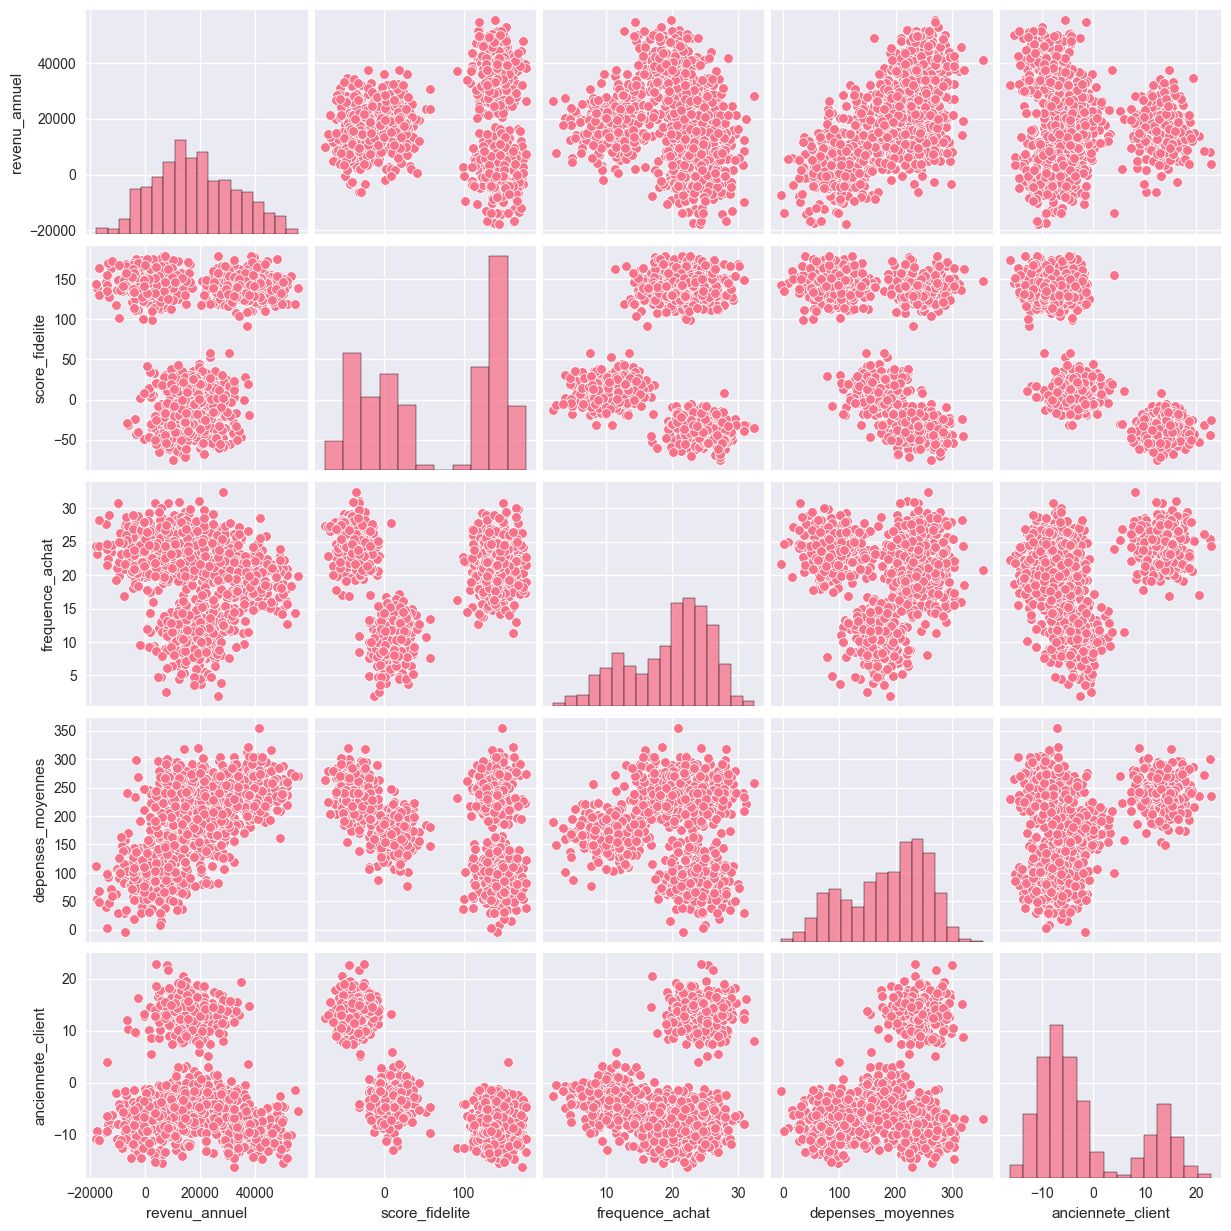

In [83]:
# Pairplot
sns.pairplot(df.select_dtypes(include='number'))
plt.show()

In [84]:
# 4. Sélection manuelle de variables pertinentes pour le clustering

# On sélectionne uniquement les colonnes numériques
df_num = df.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
X = scaler.fit_transform(df_num)

In [85]:
# 4. Clustering basé sur 2 variables principales (exemple : 'Spending Score' et 'Annual Income')
# À adapter selon les noms exacts dans ton fichier
df.columns = [col.strip() for col in df.columns]  # Nettoyage colonnes
cols = [col for col in df.columns if 'income' in col.lower() or 'spending' in col.lower()]
X = df[cols].values


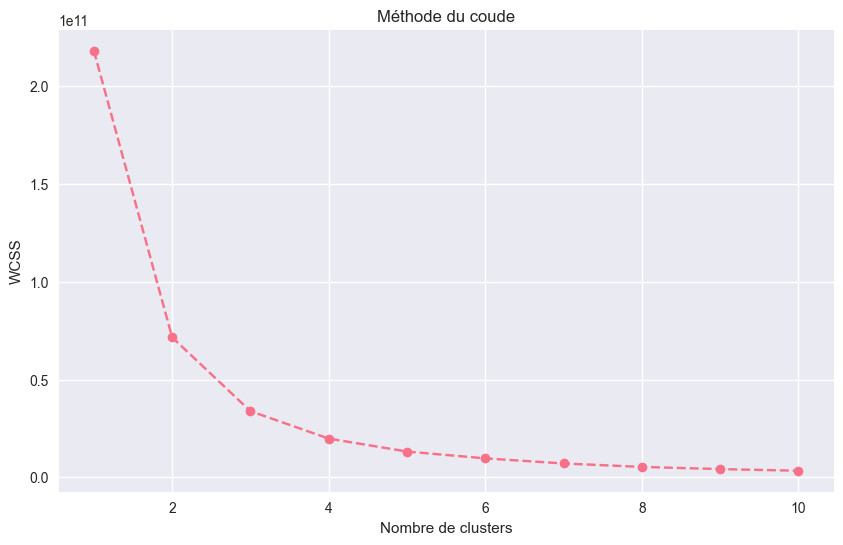

In [86]:
# 5. Détermination du K optimal - méthode du coude

# Sélection de colonnes pertinentes pour le clustering
cols = ['revenu_annuel', 'depenses_moyennes']  # Choisis les colonnes que tu veux utiliser
X = df[cols].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters")
plt.ylabel("WCSS")
plt.show()


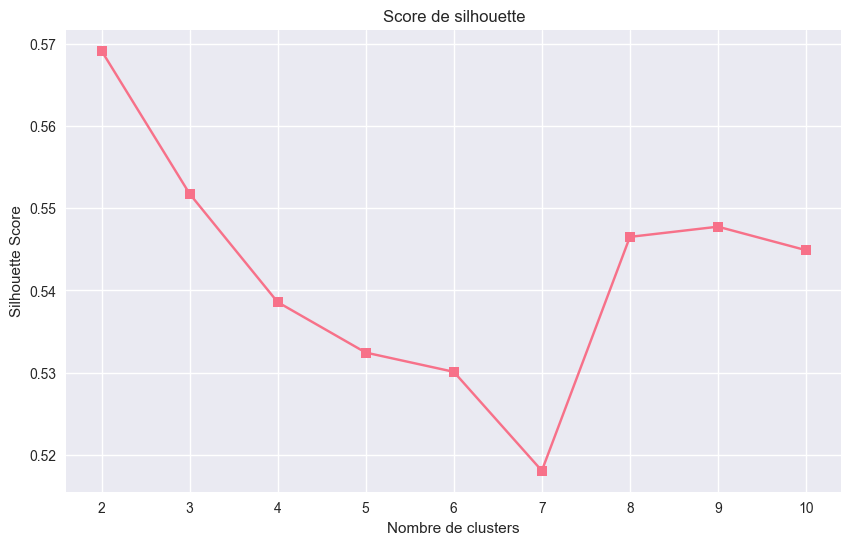

In [87]:
# 6. Score de silhouette
sil = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    sil.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(10,6))
plt.plot(range(2,11), sil, marker='s')
plt.title("Score de silhouette")
plt.xlabel("Nombre de clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [95]:
#Prediction sur les clusters
kmeans = KMeans(n_clusters=5,init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 1, 1, 3, 3, 4, 3, 4, 0, 2, 3, 1, 2, 0, 0, 4, 4, 1, 2, 3, 4, 1,
       0, 4, 3, 2, 0, 0, 0, 0, 0, 0, 3, 3, 2, 2, 4, 1, 4, 3, 4, 2, 2, 0,
       4, 2, 2, 4, 4, 4, 0, 0, 2, 2, 1, 2, 0, 3, 2, 2, 3, 0, 3, 0, 2, 4,
       1, 4, 4, 2, 4, 4, 3, 0, 2, 3, 2, 3, 2, 0, 1, 0, 1, 4, 2, 1, 2, 2,
       1, 2, 3, 4, 0, 2, 1, 4, 2, 4, 4, 2, 0, 3, 0, 4, 4, 0, 2, 1, 2, 0,
       4, 1, 2, 4, 0, 4, 2, 1, 4, 3, 1, 4, 3, 4, 2, 4, 0, 2, 1, 3, 4, 3,
       4, 0, 1, 1, 2, 4, 4, 0, 2, 0, 4, 4, 1, 4, 0, 2, 0, 3, 4, 0, 1, 1,
       4, 0, 2, 2, 1, 3, 2, 4, 3, 1, 0, 0, 1, 2, 4, 4, 4, 3, 4, 3, 4, 2,
       1, 3, 0, 3, 0, 3, 4, 1, 2, 4, 0, 0, 4, 3, 0, 0, 4, 4, 2, 1, 1, 1,
       2, 1, 4, 1, 4, 4, 0, 0, 0, 1, 4, 0, 1, 2, 4, 3, 0, 2, 3, 1, 1, 4,
       4, 0, 3, 4, 4, 3, 0, 0, 1, 4, 2, 4, 0, 0, 4, 4, 4, 3, 2, 4, 0, 4,
       0, 3, 4, 3, 0, 0, 0, 2, 4, 0, 2, 1, 0, 0, 2, 0, 1, 1, 3, 3, 0, 0,
       0, 4, 1, 3, 1, 0, 3, 0, 1, 4, 1, 4, 2, 1, 4, 0, 0, 0, 3, 3, 4, 3,
       2, 4, 4, 2, 1, 0, 2, 0, 2, 3, 2, 4, 0, 4, 3,

In [96]:
# 7. Clustering final
k_final = 5  # À ajuster selon le coude/silhouette
kmeans = KMeans(n_clusters=k_final, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

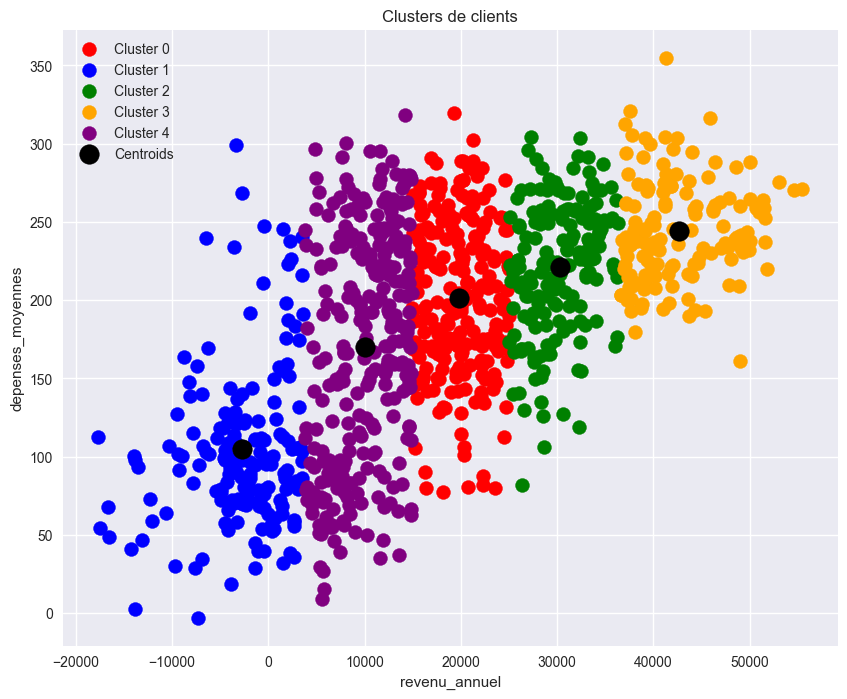

In [89]:
# 8. Visualisation des clusters
plt.figure(figsize=(10,8))
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i in range(k_final):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=100, c=colors[i], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=200, c='black', label='Centroids')
plt.title("Clusters de clients")
plt.xlabel(cols[0])
plt.ylabel(cols[1])
plt.legend()
plt.show()

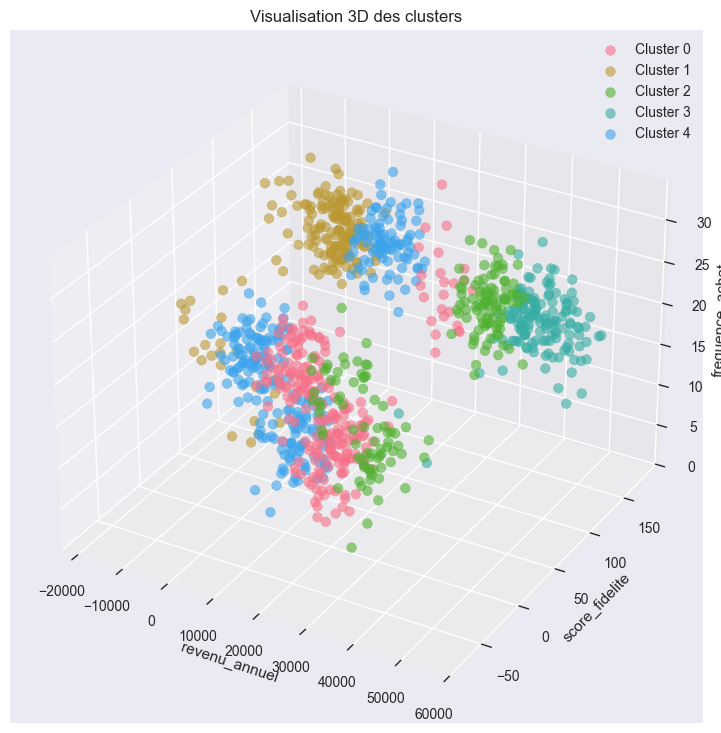

In [92]:
# 9. Visualisation 3D
if df_num.shape[1] >= 3:
    X_3d = df_num.iloc[:, :3].values  # Use the first three numeric columns
    fig = plt.figure(figsize=(11,9))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title("Visualisation 3D des clusters")
    for i in range(k_final):
        ax.scatter(
            X_3d[y_kmeans == i, 0],
            X_3d[y_kmeans == i, 1],
            X_3d[y_kmeans == i, 2],
            s=50, label=f"Cluster {i}", alpha=0.6
        )
    ax.set_xlabel(df_num.columns[0])
    ax.set_ylabel(df_num.columns[1])
    ax.set_zlabel(df_num.columns[2])
    ax.legend()
    plt.show()

In [93]:
# 9. Ajout des clusters au DataFrame

cluster_label = 'Cluster_km'
df[cluster_label] = y_kmeans

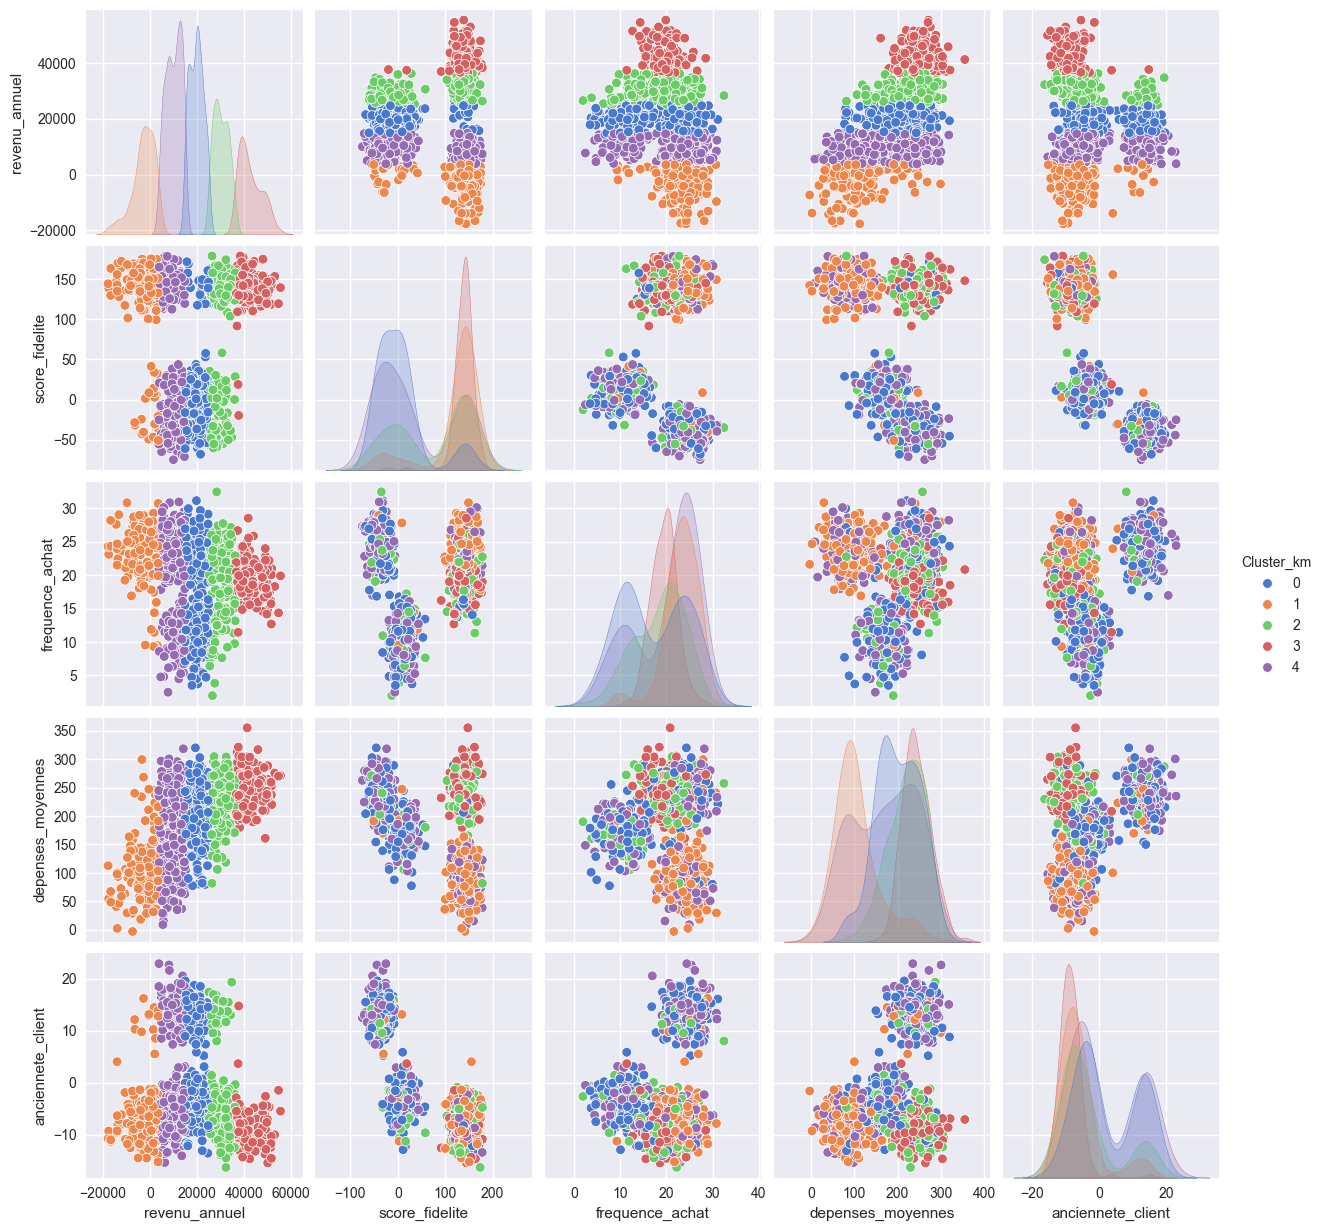

In [94]:
# 10. Pairplot avec clusters
sns.pairplot(df, hue=cluster_label, palette='muted')
plt.show()

In [21]:
# 11. Profiling des clusters
print("\n--- Profiling des clusters ---")
print(df.groupby(cluster_label).mean())


--- Profiling des clusters ---
            revenu_annuel  score_fidelite  frequence_achat  depenses_moyennes  \
Cluster_km                                                                      
0            19721.647325        4.334179        17.184870         201.262181   
1            -2783.147212      121.253132        23.193645         104.705147   
2            30192.591348       71.808679        18.481954         220.836642   
3            42629.560364      138.732666        19.436535         244.182857   
4             9963.527137       37.138723        20.129986         169.557654   

            anciennete_client  
Cluster_km                     
0                    2.817032  
1                   -5.902133  
2                   -3.173832  
3                   -8.677712  
4                    1.798732  


C:\Users\HP\AppData\Local\Temp\ipykernel_13448\3231175806.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cluster_label, data=df, palette='muted')


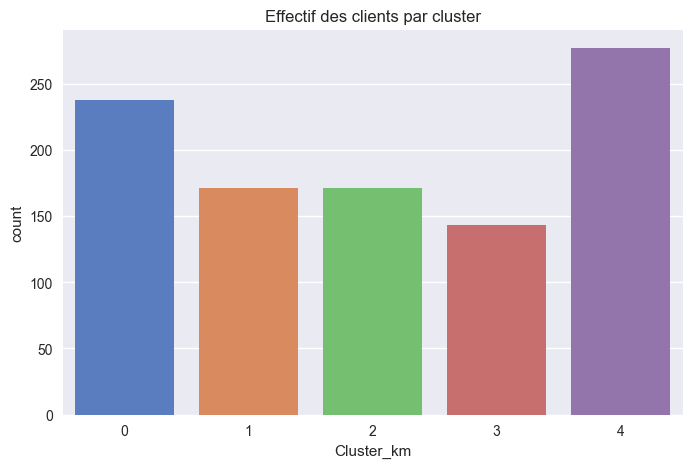

In [22]:
# 12. Effectifs par cluster
plt.figure(figsize=(8,5))
sns.countplot(x=cluster_label, data=df, palette='muted')
plt.title("Effectif des clients par cluster")
plt.show()